In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 15814 (delta 10), reused 25 (delta 2), pack-reused 15768
Receiving objects: 100% (15814/15814), 14.64 MiB | 19.55 MiB/s, done.
Resolving deltas: 100% (10819/10819), done.


In [2]:
%cd yolov5

/kaggle/working/yolov5


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
%pip install -qr requirements.txt

In [7]:
import torch
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [8]:
# !python train.py --help

In [9]:
!python train.py --img 640 --batch 2 --epochs 200 --data /kaggle/input/yolo-detection/data.yaml --weights yolov5s.pt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/kaggle/input/yolo-detection/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=2, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=ru

In [10]:
from utils.plots import plot_results

plot_results('../yolov5/runs/train/exp/results.csv')  # plot 'results.csv' as 'results.png'

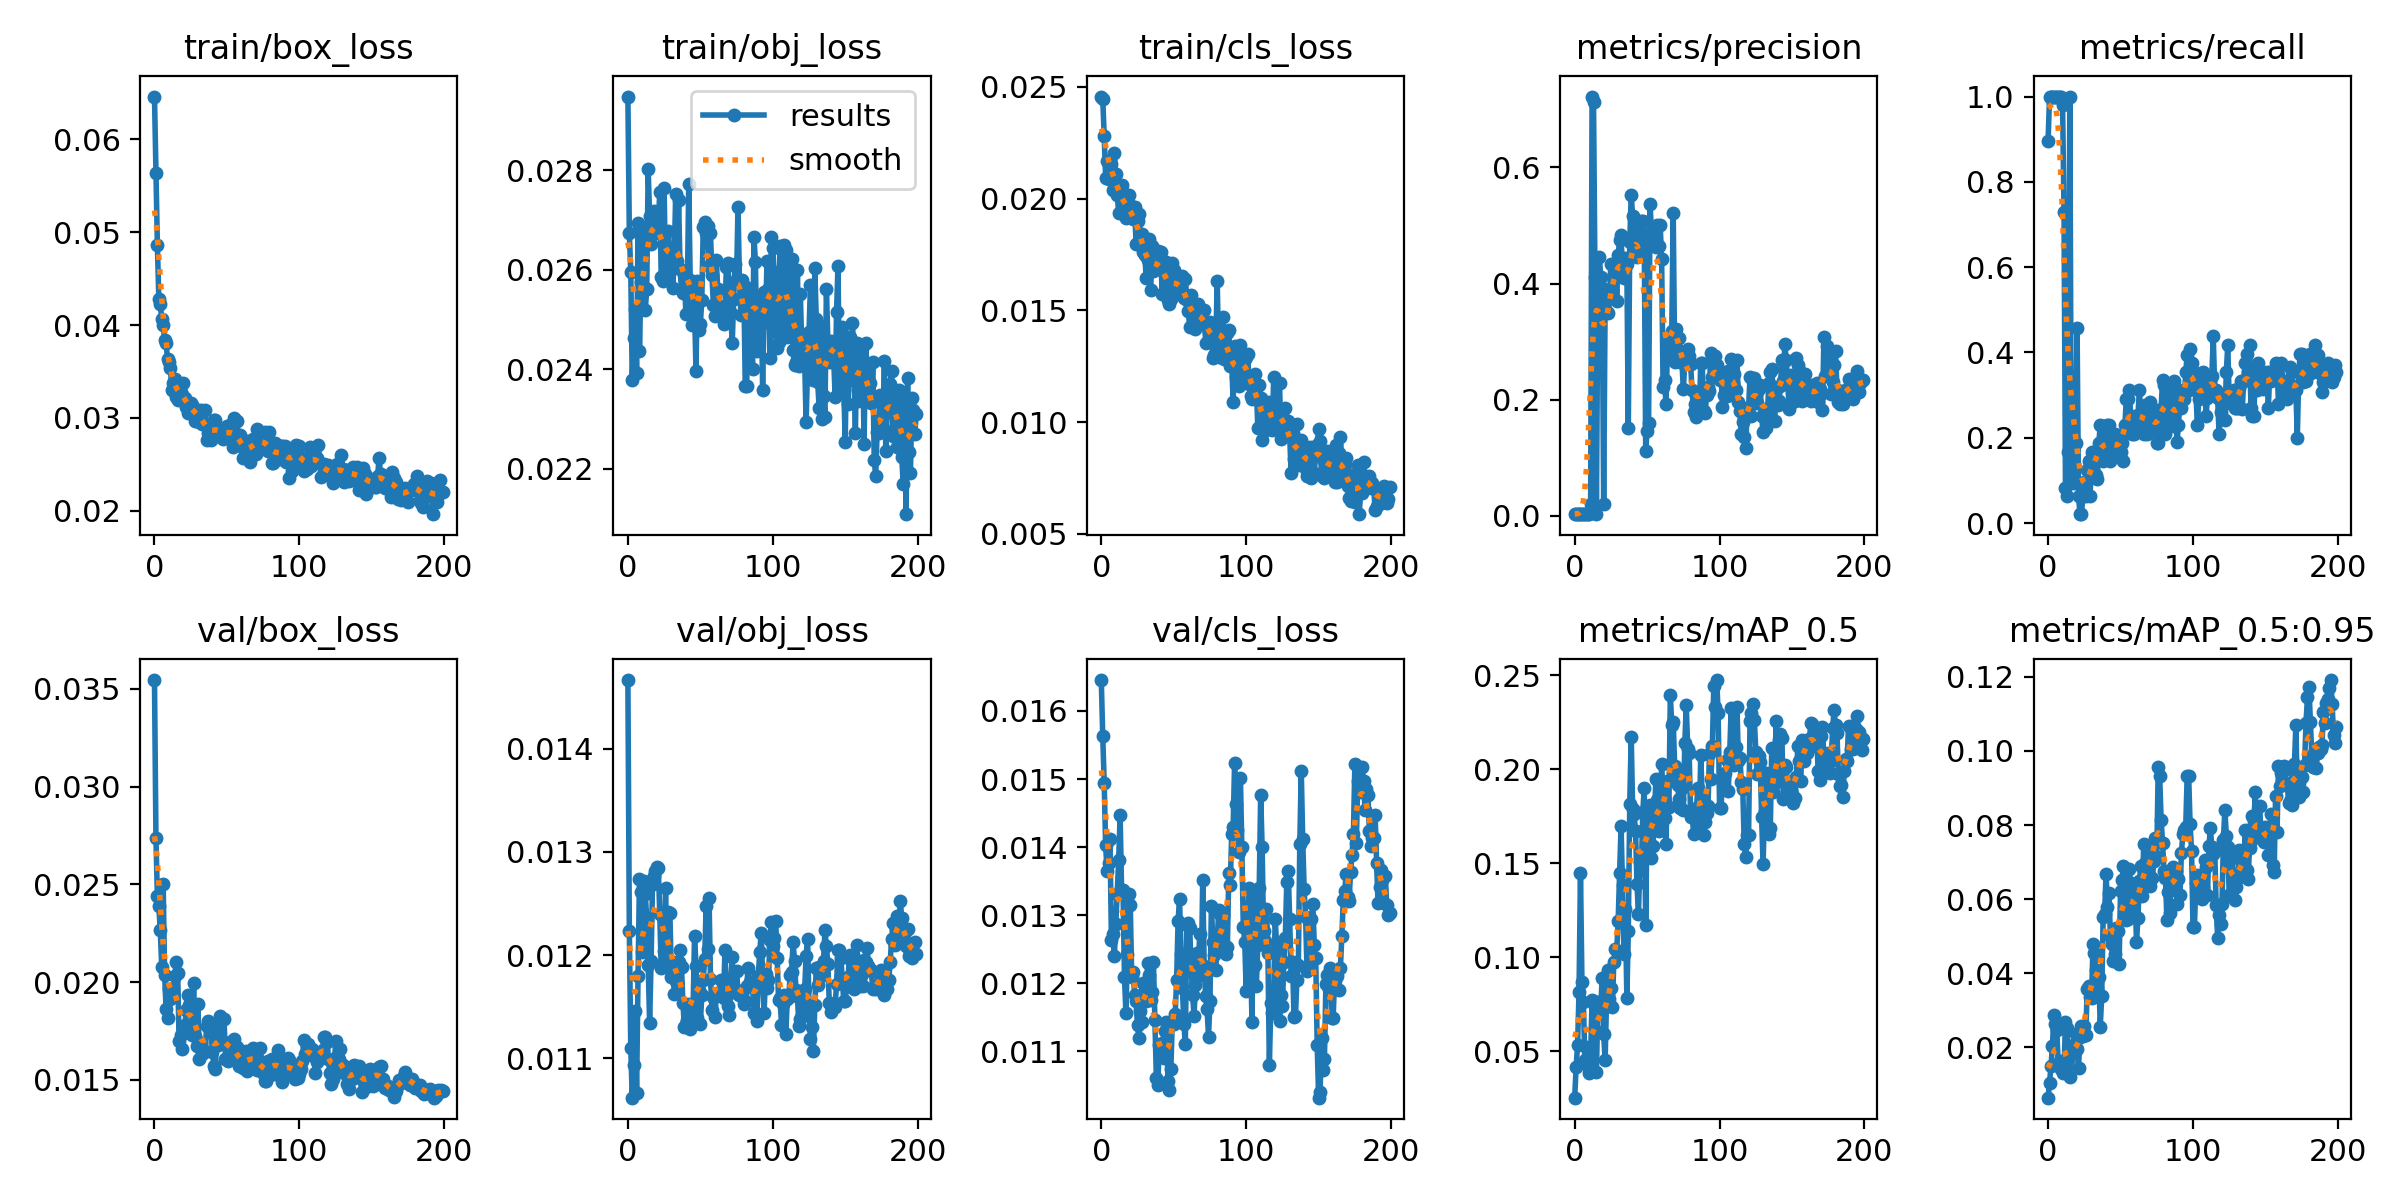

In [11]:
from IPython.display import Image

Image(filename='../yolov5/runs/train/exp/results.png', width=800)

In [12]:
import pandas as pd

df = pd.read_csv('../yolov5/runs/train/exp/results.csv')
df.head(5)

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.064606,0.029480,0.024569,0.003092,...,0.014665,0.016454,0.070312,0.003299,0.003299
1,1,0.056320,0.026734,0.024481,0.003400,...,0.012233,0.015633,0.040280,0.006599,0.006599
2,2,0.048583,0.025953,0.022824,0.003342,...,0.011095,0.014949,0.010214,0.009867,0.009867
3,3,0.042835,0.023783,0.020943,0.003621,...,0.010618,0.014034,0.009851,0.009851,0.009851
4,4,0.042218,0.024621,0.021678,0.003490,...,0.010933,0.013643,0.009851,0.009851,0.009851


In [13]:
!python detect.py --help

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE]
                 [--data DATA] [--imgsz IMGSZ [IMGSZ ...]]
                 [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--max-det MAX_DET] [--device DEVICE] [--view-img]
                 [--save-txt] [--save-conf] [--save-crop] [--nosave]
                 [--classes CLASSES [CLASSES ...]] [--agnostic-nms]
                 [--augment] [--visualize] [--update] [--project PROJECT]
                 [--name NAME] [--exist-ok] [--line-thickness LINE_THICKNESS]
                 [--hide-labels] [--hide-conf] [--half] [--dnn]
                 [--vid-stride VID_STRIDE]

options:
  -h, --help            show this help message and exit
  --weights WEIGHTS 

In [30]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.09 --source /kaggle/input/test-images

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
detect: weights=['runs/train/exp/weights/last.pt'], source=/kaggle/input/test-images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.09, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /kaggle/input/test-images/mtc_0000000084.jpg: 640x480 (no detections), 45

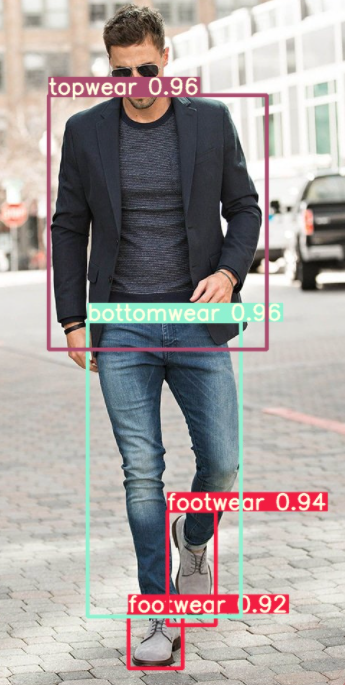

In [32]:
Image(filename = '/kaggle/working/yolov5/runs/detect/exp5/sample.jpg' , width = 600)